<a href="https://colab.research.google.com/github/mantingsun0/colab0/blob/main/Critical_Spots_Finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = '/content/drive/My Drive/SKILL_ML/Critical_Spots/'
files = os.listdir(path)
print("Files in the directory:", files)

Files in the directory: ['0_P.png', '0_PH.png', '0_SM.png', '0_N.png']


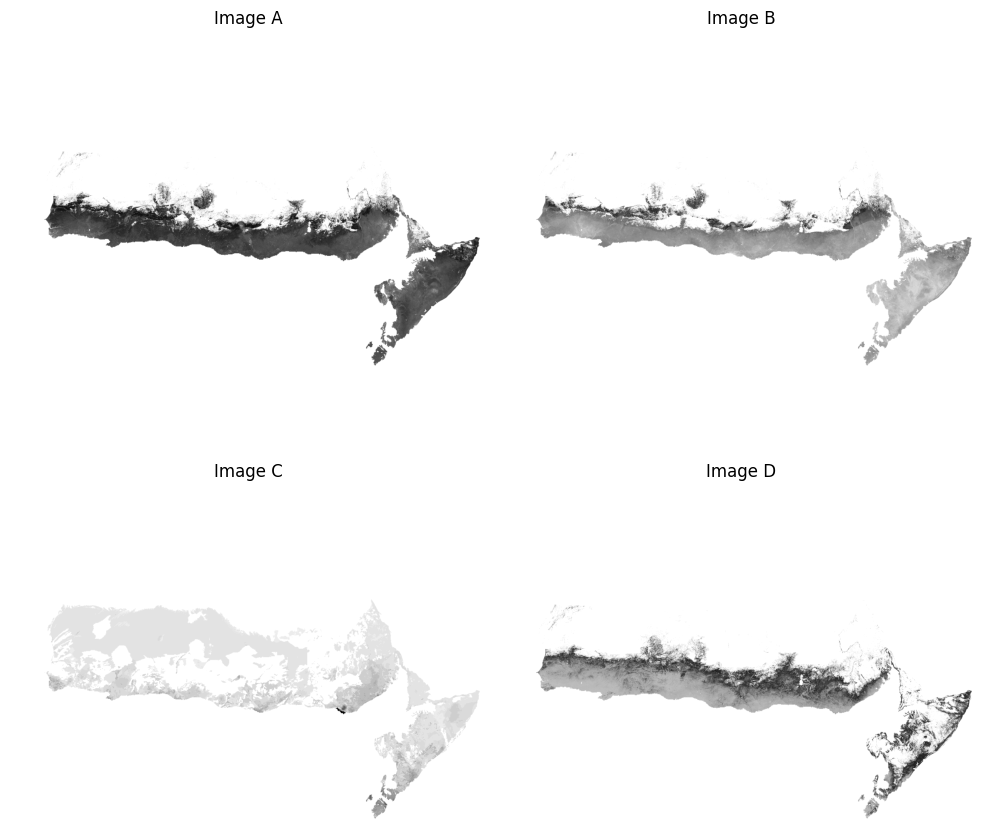

In [ ]:
# Load the images
imageA = cv2.imread('/content/drive/My Drive/SKILL_ML/Critical_Spots/0_N.png', cv2.IMREAD_GRAYSCALE)
imageB = cv2.imread('/content/drive/My Drive/SKILL_ML/Critical_Spots/0_P.png', cv2.IMREAD_GRAYSCALE)
imageC = cv2.imread('/content/drive/My Drive/SKILL_ML/Critical_Spots/0_SM.png', cv2.IMREAD_GRAYSCALE)
imageD = cv2.imread('/content/drive/My Drive/SKILL_ML/Critical_Spots/0_PH.png', cv2.IMREAD_GRAYSCALE)

# Preview
if all([imageA is not None, imageB is not None, imageC is not None, imageD is not None]):
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(imageA, cmap='gray')
    plt.title('Image A')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(imageB, cmap='gray')
    plt.title('Image B')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(imageC, cmap='gray')
    plt.title('Image C')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(imageD, cmap='gray')
    plt.title('Image D')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("One or more images failed to load. Please check the paths and filenames.")


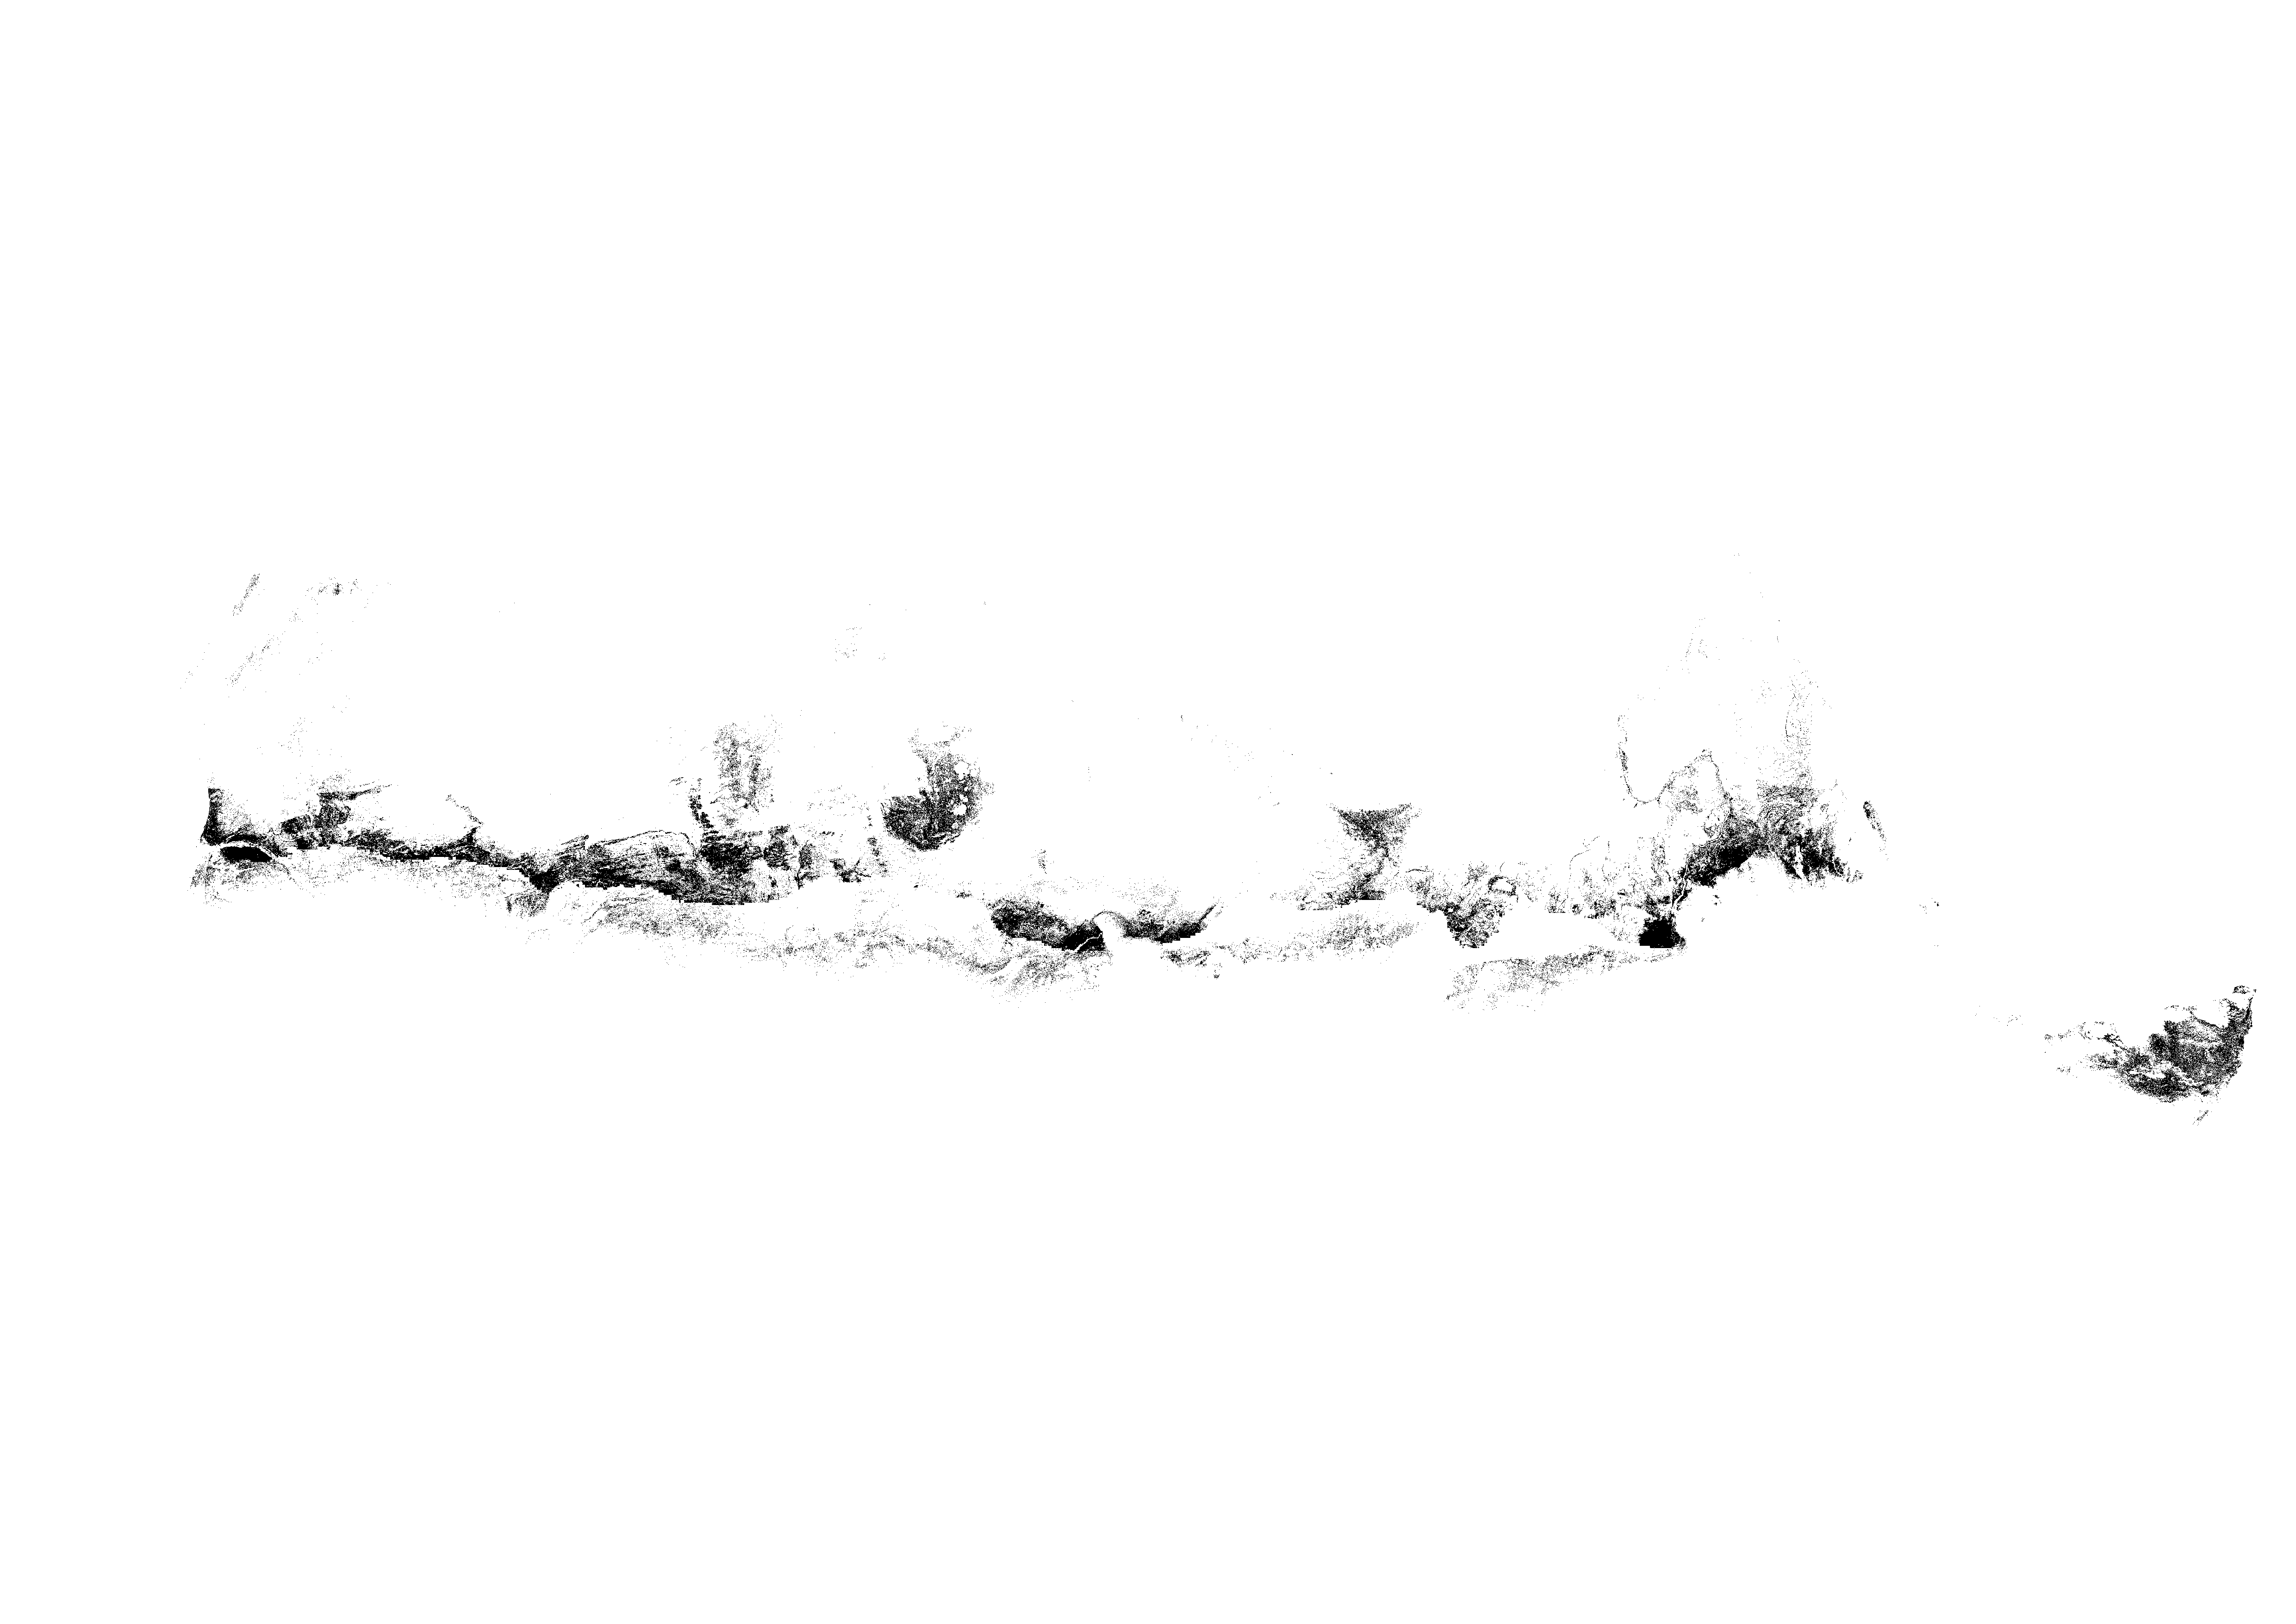

In [ ]:
# Ensure both images are the same size
if imageA.shape != imageB.shape:
    imageB = cv2.resize(imageB, (imageA.shape[1], imageA.shape[0]))

# Calculate the average of the two images, (imageA + imageB) / 2)
average_image = cv2.addWeighted(imageA, 0.5, imageB, 0.5, 0)

# Set threshold, you can adjust this value
threshold = 105  #@param{type:'slider', min:0, max:255, step:1}

# Apply threshold
_, thresholded_image = cv2.threshold(average_image, threshold, 255, cv2.THRESH_BINARY)

# Display the result
cv2_imshow(thresholded_image)


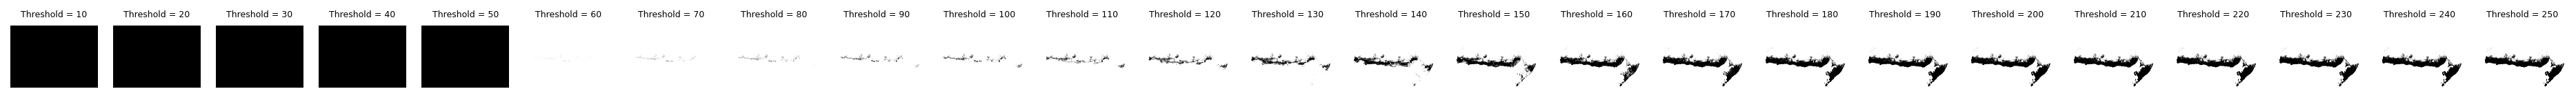

In [ ]:
# Set up the subplot
n_cols = 25  # Number of columns in subplot
n_rows = 1   # Number of rows in subplot

plt.figure(figsize=(25, 10), dpi=150)

# Loop through the range of threshold values
for i, threshold in enumerate(range(10, 251, 10)):
    _, thresholded_image = cv2.threshold(average_image, threshold, 255, cv2.THRESH_BINARY)

    # Add a subplot for each threshold
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f'Threshold = {threshold}', fontsize=6)  # Reduce font size
    plt.axis('off')

plt.tight_layout()
plt.show()

# choose the one work for you